In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import seaborn as sns
import pickle
from math import pi 


In [2]:
pd.set_option('display.max_columns', 100, 'display.max_rows', 100)

In [3]:
oski = pd.read_csv('../../1-data-collection/data/oski.csv')
vati = pd.read_csv('../../1-data-collection/data/vati.csv')
monkeymoon = pd.read_csv('../../1-data-collection/data/monkeymoon.csv')

In [4]:
boay = pd.read_csv('../../1-data-collection/data/boay00.csv')
vinu = pd.read_csv('../../1-data-collection/data/vinu.csv')
eden = pd.read_csv('../../1-data-collection/data/eden.csv')
cho = pd.read_csv('../../1-data-collection/data/cho_shmo.csv')


In [5]:
oski_mean = oski.describe().T[['mean']].rename(columns = {'mean' : 'oski'})
vati_mean = vati.describe().T[['mean']].rename(columns = {'mean' : 'vati'})
monk_mean = monkeymoon.describe().T[['mean']].rename(columns = {'mean' : 'monkeymoon'})
boay_mean = boay.describe().T[['mean']].rename(columns = {'mean' : 'boay'})
vinu_mean = vinu.describe().T[['mean']].rename(columns = {'mean' : 'vinu'})
eden_mean = eden.describe().T[['mean']].rename(columns = {'mean' : 'eden'})
cho_mean = cho.describe().T[['mean']].rename(columns = {'mean' : 'cho'})


In [6]:
oski_mean.shape

(82, 1)

In [7]:
boay_mean.shape

(82, 1)

In [8]:
pros = pd.concat([oski_mean, vati_mean, monk_mean], axis = 1)

In [9]:
casual = pd.concat([boay_mean, vinu_mean, eden_mean, cho_mean], axis = 1)

In [10]:
pros.shape

(83, 3)

In [11]:
pros

,oski,vati,monkeymoon
shots,3.000000,2.968750,3.288538
shots_against,6.775385,6.895833,7.671937
goals,0.818462,0.770833,0.877470
goals_against,1.747692,1.596354,2.000000
saves,1.258462,1.544271,1.984190
assists,0.495385,0.627604,0.612648
score,356.544615,384.794271,451.418972
shooting_percentage,26.631135,24.980985,24.702359
bpm,494.030769,424.106771,408.790514
bcpm,497.376185,435.693972,422.106681


In [12]:
pros = pros.T
casual = casual.T

In [13]:
boay.mvp.value_counts(normalize = True)

False    1.0
Name: mvp, dtype: float64

In [14]:
# pros['mvp'] = [oski.mvp.value_counts(normalize = True)[1],vati.mvp.value_counts(normalize = True)[1],
#               monkeymoon.mvp.value_counts(normalize = True)[1], boay.mvp.value_counts(normalize = True)[1]]

In [15]:
pros.drop(columns = 'goals_against_while_last_defender', inplace = True)
casual.drop(columns = 'goals_against_while_last_defender', inplace = True)


In [16]:
pros = pros.T
casual = casual.T

In [17]:
pros.shape

(82, 3)

In [18]:
pros

,oski,vati,monkeymoon
shots,3.000000,2.968750,3.288538
shots_against,6.775385,6.895833,7.671937
goals,0.818462,0.770833,0.877470
goals_against,1.747692,1.596354,2.000000
saves,1.258462,1.544271,1.984190
assists,0.495385,0.627604,0.612648
score,356.544615,384.794271,451.418972
shooting_percentage,26.631135,24.980985,24.702359
bpm,494.030769,424.106771,408.790514
bcpm,497.376185,435.693972,422.106681


In [19]:
pros = pros.T
casual = casual.T

In [20]:
to_drop = [
    'shots_against',
    'goals_against',
    'shooting_percentage',
    'bpm',
    'amount_stolen_big',
    'amount_stolen_small',
    'count_collected_big',
    'count_collected_small',
    'count_stolen_small',
    'count_stolen_big',
    'amount_overfill_stolen',
    'time_zero_boost',
    'time_full_boost',
    'time_boost_0_25',
    'time_boost_25_50',
    'time_boost_50_75',
    'time_boost_75_100',
    'avg_speed',
    'total_distance',
    'time_supersonic_speed',
    'time_boost_speed',
    'time_slow_speed',
    'time_ground',
    'time_low_air',
    'time_high_air',
    'time_powerslide',
    'time_defensive_third',
    'time_neutral_third',
    'time_offensive_third',
    'time_defensive_half',
    'time_offensive_half',
    'time_behind_ball',
    'time_infront_ball',
    'time_most_back',
    'time_most_forward',
    'time_closest_to_ball',
    'time_farthest_from_ball'
]

In [21]:
pros.drop(columns = to_drop, inplace = True)
casual.drop(columns = to_drop, inplace = True)

In [22]:
pros = pros.T
casual = casual.T

In [23]:
pros

,oski,vati,monkeymoon
shots,3.000000,2.968750,3.288538
goals,0.818462,0.770833,0.877470
saves,1.258462,1.544271,1.984190
assists,0.495385,0.627604,0.612648
score,356.544615,384.794271,451.418972
bcpm,497.376185,435.693972,422.106681
avg_amount,47.051446,51.442031,51.636206
amount_collected,2706.264615,2436.658854,2512.790514
amount_stolen,672.058462,559.830729,548.011858
amount_collected_big,1946.938462,1719.278646,1697.126482


In [24]:
mm = pros[['monkeymoon']]

In [25]:
mm

,monkeymoon
shots,3.288538
goals,0.877470
saves,1.984190
assists,0.612648
score,451.418972
bcpm,422.106681
avg_amount,51.636206
amount_collected,2512.790514
amount_stolen,548.011858
amount_collected_big,1697.126482


In [26]:
speed = ['count_powerslide', 
         'percent_supersonic_speed', 
         'avg_speed_percentage', 
         'percent_slow_speed',
         'percent_high_air',
         'percent_low_air',
         'percent_ground',
         'bcpm'
        ]

boost_efficiency = ['bcpm',
                    'avg_amount',
                    'amount_collected',
                    'amount_collected_big',
                    'amount_collected_small',
                    'amount_overfill',
                    'amount_used_while_supersonic',
                    'percent_zero_boost',
                    'percent_full_boost',
                    'percent_boost_0_25',
                    'percent_boost_25_50',
                    'percent_boost_50_75',
                    'percent_boost_75_100',
                    'avg_powerslide_duration',
                    'avg_speed_percentage',
                    'percent_boost_speed',
                    'percent_ground',
                    'percent_low_air',
                    'percent_high_air'
]

aggression = ['amount_stolen',
              'amount_used_while_supersonic',
              'avg_distance_to_mates',
              'inflicted',
              'percent_defensive_third',
              'percent_offensive_third',
              'percent_infront_ball',
              'percent_most_back',
              'percent_most_forward'
]

team_cohesion = ['goals',
                 'assists',
                 'amount_collected_big',
                 'amount_collected_small',
                 'avg_distance_to_ball_possession',
                 'avg_distance_to_ball_no_possession',
                 'avg_distance_to_mates'
]

game_involvement = ['score',
                    'amount_collected',
                    'amount_stolen',
                    'percent_low_air',
                    'percent_ground',
                    'avg_distance_to_ball_possession',
                    'avg_distance_to_ball_no_possession',
                    'percent_closest_to_ball',
                    'percent_farthest_from_ball',
                    'inflicted'
]

In [27]:
pros = pros.T
casual = casual.T

In [28]:
speed_df_pros = pros.loc[:, speed]
boost_efficiency_df_pros = pros.loc[:, boost_efficiency]
aggression_df_pros = pros.loc[:, aggression]
team_cohesion_df_pros = pros.loc[:, team_cohesion]
game_involvement_df_pros = pros.loc[:, game_involvement]

In [29]:
speed_df_casual = casual.loc[:, speed]
boost_efficiency_df_casual = casual.loc[:, boost_efficiency]
aggression_df_casual = casual.loc[:, aggression]
team_cohesion_df_casual = casual.loc[:, team_cohesion]
game_involvement_df_casual = casual.loc[:, game_involvement]

# Attempt 1

- These metrics were made just as a trial run - they were improved upon in later attempts

In [30]:
speed_df_pros['speed'] = (speed_df_pros.count_powerslide / 2
                    ) + ((speed_df_pros.percent_supersonic_speed/speed_df_pros.percent_slow_speed
                    ) * 100) + (speed_df_pros.avg_speed_percentage / 2
                    ) + (speed_df_pros.percent_high_air * 5
                    ) + ((speed_df_pros.percent_low_air / speed_df_pros.percent_ground) * 35
                    ) + (speed_df_pros.bcpm / 15)
speed_df_pros['speed'] = speed_df_pros['speed'] / max(speed_df_pros.speed) * 9.5

In [31]:
speed_df_pros

,count_powerslide,percent_supersonic_speed,avg_speed_percentage,percent_slow_speed,percent_high_air,percent_low_air,percent_ground,bcpm,speed
oski,72.335385,23.238157,72.287893,36.667189,7.588786,40.737867,51.057962,497.376185,9.500000
vati,62.471354,20.384203,69.720222,41.092010,6.852308,41.476687,51.671005,435.693972,8.382462
monkeymoon,50.260870,15.647610,67.112734,45.365997,6.726940,36.338459,56.934602,422.106681,7.175835


In [32]:
boost_efficiency_df_pros['boost_efficiency'] = (boost_efficiency_df_pros.amount_collected_small / boost_efficiency_df_pros.amount_collected
                                          ) + ((boost_efficiency_df_pros.avg_speed_percentage / boost_efficiency_df_pros.bcpm
                                          ) * 40) + ((100 / boost_efficiency_df_pros.amount_overfill
                                          ) * 20) + ((100 / boost_efficiency_df_pros.amount_used_while_supersonic
                                          ) * 20) + (60 / boost_efficiency_df_pros.percent_zero_boost
                                          ) + (60 / boost_efficiency_df_pros.percent_full_boost
                                          ) + (((boost_efficiency_df_pros.percent_boost_25_50
                                               + boost_efficiency_df_pros.percent_boost_50_75)
                                               / (boost_efficiency_df_pros.percent_boost_0_25
                                              + boost_efficiency_df_pros.percent_boost_75_100)
                                          ) * 10
                                          ) + (abs(0.1 - boost_efficiency_df_pros.avg_powerslide_duration
                                          ) * 10
                                          )
                                          
                                          

boost_efficiency_df_pros['boost_efficiency'] = (boost_efficiency_df_pros.boost_efficiency / max(boost_efficiency_df_pros.boost_efficiency
                                                                                    )) * 9.5

In [33]:
boost_efficiency_df_pros

,bcpm,avg_amount,amount_collected,amount_collected_big,amount_collected_small,amount_overfill,amount_used_while_supersonic,percent_zero_boost,percent_full_boost,percent_boost_0_25,percent_boost_25_50,percent_boost_50_75,percent_boost_75_100,avg_powerslide_duration,avg_speed_percentage,percent_boost_speed,percent_ground,percent_low_air,percent_high_air,boost_efficiency
oski,497.376185,47.051446,2706.264615,1946.938462,759.326154,332.941538,439.753846,15.317802,9.959190,39.770842,20.118585,15.243598,24.251590,0.110092,72.287893,39.479269,51.057962,40.737867,7.588786,8.035053
vati,435.693972,51.442031,2436.658854,1719.278646,717.380208,397.833333,306.440104,12.243709,13.080054,32.230267,19.784638,16.836697,30.627565,0.112552,69.720222,38.523788,51.671005,41.476687,6.852308,8.402480
monkeymoon,422.106681,51.636206,2512.790514,1697.126482,815.664032,311.067194,324.976285,9.837549,9.975981,32.405493,20.995220,18.468815,28.130473,0.118775,67.112734,38.986393,56.934602,36.338459,6.726940,9.500000


In [34]:
aggression_df_pros

,amount_stolen,amount_used_while_supersonic,avg_distance_to_mates,inflicted,percent_defensive_third,percent_offensive_third,percent_infront_ball,percent_most_back,percent_most_forward
oski,672.058462,439.753846,3756.556923,1.018462,42.472912,24.311262,30.194174,31.686104,36.376107
vati,559.830729,306.440104,3655.294271,0.908854,46.198045,21.948750,27.724472,35.928961,34.646231
monkeymoon,548.011858,324.976285,3538.628458,0.980237,47.893841,20.597128,25.622365,37.515347,31.003726


In [35]:
aggression_df_pros['aggression'] = (aggression_df_pros.amount_stolen / 100
                              ) + (aggression_df_pros.amount_used_while_supersonic / 100
                              ) + (aggression_df_pros.avg_distance_to_mates / 40
                              ) + (aggression_df_pros.inflicted * 6
                              ) + ((aggression_df_pros.percent_offensive_third/aggression_df_pros.percent_defensive_third
                              ) * 10
                              ) + (aggression_df_pros.percent_infront_ball / 10
                              ) + ((aggression_df_pros.percent_most_forward/aggression_df_pros.percent_most_back
                              ) * 10)

aggression_df_pros['aggression'] = (aggression_df_pros.aggression / max(aggression_df_pros.aggression
                                                                                    )) * 9.5

In [36]:
aggression_df_pros

,amount_stolen,amount_used_while_supersonic,avg_distance_to_mates,inflicted,percent_defensive_third,percent_offensive_third,percent_infront_ball,percent_most_back,percent_most_forward,aggression
oski,672.058462,439.753846,3756.556923,1.018462,42.472912,24.311262,30.194174,31.686104,36.376107,9.500000
vati,559.830729,306.440104,3655.294271,0.908854,46.198045,21.948750,27.724472,35.928961,34.646231,8.870721
monkeymoon,548.011858,324.976285,3538.628458,0.980237,47.893841,20.597128,25.622365,37.515347,31.003726,8.548150


In [37]:
team_cohesion_df_pros

,goals,assists,amount_collected_big,amount_collected_small,avg_distance_to_ball_possession,avg_distance_to_ball_no_possession,avg_distance_to_mates
oski,0.818462,0.495385,1946.938462,759.326154,2602.575385,2984.086154,3756.556923
vati,0.770833,0.627604,1719.278646,717.380208,2693.927083,3009.307292,3655.294271
monkeymoon,0.877470,0.612648,1697.126482,815.664032,2671.644269,2888.332016,3538.628458


In [38]:
team_cohesion_df_pros['team_cohesion'] = ((team_cohesion_df_pros.assists / team_cohesion_df_pros.goals
                                    ) * 10 
                                    ) + ((team_cohesion_df_pros.amount_collected_small / team_cohesion_df_pros.amount_collected_big
                                    ) * 12
                                    ) + (team_cohesion_df_pros.avg_distance_to_mates / 500)

team_cohesion_df_pros['team_cohesion'] = (team_cohesion_df_pros.team_cohesion / max(team_cohesion_df_pros.team_cohesion
                                                                                    )) * 9.5

In [39]:
team_cohesion_df_pros

,goals,assists,amount_collected_big,amount_collected_small,avg_distance_to_ball_possession,avg_distance_to_ball_no_possession,avg_distance_to_mates,team_cohesion
oski,0.818462,0.495385,1946.938462,759.326154,2602.575385,2984.086154,3756.556923,8.472116
vati,0.770833,0.627604,1719.278646,717.380208,2693.927083,3009.307292,3655.294271,9.500000
monkeymoon,0.877470,0.612648,1697.126482,815.664032,2671.644269,2888.332016,3538.628458,9.206105


In [40]:
game_involvement_df_pros

,score,amount_collected,amount_stolen,percent_low_air,percent_ground,avg_distance_to_ball_possession,avg_distance_to_ball_no_possession,percent_closest_to_ball,percent_farthest_from_ball,inflicted
oski,356.544615,2706.264615,672.058462,40.737867,51.057962,2602.575385,2984.086154,35.469758,32.276338,1.018462
vati,384.794271,2436.658854,559.830729,41.476687,51.671005,2693.927083,3009.307292,32.862843,37.382930,0.908854
monkeymoon,451.418972,2512.790514,548.011858,36.338459,56.934602,2671.644269,2888.332016,34.045967,34.272065,0.980237


In [41]:
game_involvement_df_pros['game_involvement'] = (game_involvement_df_pros.score / 100
                                          ) + ((game_involvement_df_pros.amount_stolen / game_involvement_df_pros.amount_collected
                                          ) * 200
                                          ) + ((100 - game_involvement_df_pros.percent_ground
                                          ) / 10
                                          ) + ((33.33 - game_involvement_df_pros.percent_closest_to_ball
                                          ) * -1
                                          ) + (game_involvement_df_pros.inflicted
                                          ) * 5

game_involvement_df_pros['game_involvement'] = (game_involvement_df_pros.game_involvement / max(game_involvement_df_pros.game_involvement
                                                                                    )) * 9

In [42]:
game_involvement_df_pros

,score,amount_collected,amount_stolen,percent_low_air,percent_ground,avg_distance_to_ball_possession,avg_distance_to_ball_no_possession,percent_closest_to_ball,percent_farthest_from_ball,inflicted,game_involvement
oski,356.544615,2706.264615,672.058462,40.737867,51.057962,2602.575385,2984.086154,35.469758,32.276338,1.018462,9.000000
vati,384.794271,2436.658854,559.830729,41.476687,51.671005,2693.927083,3009.307292,32.862843,37.382930,0.908854,8.084290
monkeymoon,451.418972,2512.790514,548.011858,36.338459,56.934602,2671.644269,2888.332016,34.045967,34.272065,0.980237,7.994375


In [43]:
boost_efficiency_df_pros

,bcpm,avg_amount,amount_collected,amount_collected_big,amount_collected_small,amount_overfill,amount_used_while_supersonic,percent_zero_boost,percent_full_boost,percent_boost_0_25,percent_boost_25_50,percent_boost_50_75,percent_boost_75_100,avg_powerslide_duration,avg_speed_percentage,percent_boost_speed,percent_ground,percent_low_air,percent_high_air,boost_efficiency
oski,497.376185,47.051446,2706.264615,1946.938462,759.326154,332.941538,439.753846,15.317802,9.959190,39.770842,20.118585,15.243598,24.251590,0.110092,72.287893,39.479269,51.057962,40.737867,7.588786,8.035053
vati,435.693972,51.442031,2436.658854,1719.278646,717.380208,397.833333,306.440104,12.243709,13.080054,32.230267,19.784638,16.836697,30.627565,0.112552,69.720222,38.523788,51.671005,41.476687,6.852308,8.402480
monkeymoon,422.106681,51.636206,2512.790514,1697.126482,815.664032,311.067194,324.976285,9.837549,9.975981,32.405493,20.995220,18.468815,28.130473,0.118775,67.112734,38.986393,56.934602,36.338459,6.726940,9.500000


# Attempt (2)?

- After some trial and error and adjustments, the following code shows that each metric used has a roughly similar weighting on the total score for each category of stats

In [44]:
max_boost_eff = max(boost_efficiency_df_pros.avg_amount * (((boost_efficiency_df_pros.amount_collected_small / boost_efficiency_df_pros.amount_collected
                                          ) * 25) + ((boost_efficiency_df_pros.bcpm / boost_efficiency_df_pros.avg_speed_percentage
                                          )) + (1 / (boost_efficiency_df_pros.amount_overfill / boost_efficiency_df_pros.amount_collected)
                                          ) + (0.8 / (boost_efficiency_df_pros.amount_used_while_supersonic / boost_efficiency_df_pros.amount_collected)
                                          ) + (75 / boost_efficiency_df_pros.percent_zero_boost
                                          ) + (1 - (abs(boost_efficiency_df_pros.avg_powerslide_duration - 0.1
                                          )) * 100) + (((boost_efficiency_df_pros.percent_boost_50_75
                                                + boost_efficiency_df_pros.percent_boost_75_100)
                                               / (boost_efficiency_df_pros.percent_boost_0_25
                                                + boost_efficiency_df_pros.percent_boost_25_50)
                                              ) * 10)
) / 250)

In [45]:
(0.8 / (boost_efficiency_df_pros.amount_used_while_supersonic / boost_efficiency_df_pros.amount_collected)
                                          )

oski          4.923235
vati          6.361201
monkeymoon    6.185782
dtype: float64

In [46]:
(((boost_efficiency_df_pros.percent_boost_50_75
                                                + boost_efficiency_df_pros.percent_boost_75_100)
                                               / (boost_efficiency_df_pros.percent_boost_0_25
                                                + boost_efficiency_df_pros.percent_boost_25_50)
                                              ) * 10)

oski          6.594685
vati          9.125127
monkeymoon    8.726342
dtype: float64

In [47]:
(1 - (abs(boost_efficiency_df_pros.avg_powerslide_duration - 0.1
                                          )) * 10
                                          ) * 10

oski          8.990769
vati          8.744792
monkeymoon    8.122530
Name: avg_powerslide_duration, dtype: float64

In [48]:
((100 / boost_efficiency_df_pros.percent_boost_speed) * boost_efficiency_df_pros.avg_speed_percentage
                                          ) / 20

oski          9.155171
vati          9.048983
monkeymoon    8.607200
dtype: float64

In [49]:
max_speed = max((speed_df_pros.count_powerslide / 10
                    ) + (speed_df_pros.avg_speed_percentage / 10
                    ) + (speed_df_pros.percent_high_air
                    ) + ((speed_df_pros.percent_low_air / speed_df_pros.percent_ground) * 9
                    ) + (speed_df_pros.bcpm / 66) + ((speed_df_pros.percent_supersonic_speed/speed_df_pros.percent_slow_speed
                    ) * 15))

In [50]:
(speed_df_pros.count_powerslide / 10
                    ) 

oski          7.233538
vati          6.247135
monkeymoon    5.026087
Name: count_powerslide, dtype: float64

In [51]:
((speed_df_pros.percent_supersonic_speed/speed_df_pros.percent_slow_speed
                    ) * 15)

oski          9.506383
vati          7.440937
monkeymoon    5.173790
dtype: float64

In [52]:
(speed_df_pros.avg_speed_percentage
                    ) / 10

oski          7.228789
vati          6.972022
monkeymoon    6.711273
Name: avg_speed_percentage, dtype: float64

In [53]:
(speed_df_pros.percent_high_air
                    )

oski          7.588786
vati          6.852308
monkeymoon    6.726940
Name: percent_high_air, dtype: float64

In [54]:
((speed_df_pros.percent_low_air / speed_df_pros.percent_ground) * 9
)

oski          7.180874
vati          7.224365
monkeymoon    5.744242
dtype: float64

In [55]:
(speed_df_pros.bcpm / 66)

oski          7.536003
vati          6.601424
monkeymoon    6.395556
Name: bcpm, dtype: float64

In [56]:
max_agg = max((aggression_df_pros.amount_stolen / 100
                              ) + ((aggression_df_pros.amount_used_while_supersonic / 100
                              ) * 1.66) + (aggression_df_pros.avg_distance_to_mates / 540
                              ) + (aggression_df_pros.inflicted * 6
                              ) + ((aggression_df_pros.percent_offensive_third/aggression_df_pros.percent_defensive_third
                              ) * 12) + ((aggression_df_pros.percent_infront_ball / 10
                              ) * 2.2) + ((aggression_df_pros.percent_most_forward/aggression_df_pros.percent_most_back
                              ) * 6))

In [57]:
(aggression_df_pros.amount_stolen / 100
                              )

oski          6.720585
vati          5.598307
monkeymoon    5.480119
Name: amount_stolen, dtype: float64

In [58]:
(aggression_df_pros.amount_used_while_supersonic / 100
                              ) * 1.66

oski          7.299914
vati          5.086906
monkeymoon    5.394606
Name: amount_used_while_supersonic, dtype: float64

In [59]:
(aggression_df_pros.avg_distance_to_mates / 540
                              ) 

oski          6.956587
vati          6.769063
monkeymoon    6.553016
Name: avg_distance_to_mates, dtype: float64

In [60]:
(aggression_df_pros.inflicted * 6
                              )

oski          6.110769
vati          5.453125
monkeymoon    5.881423
Name: inflicted, dtype: float64

In [61]:
((aggression_df_pros.percent_offensive_third/aggression_df_pros.percent_defensive_third)
        ) * 12

oski          6.868734
vati          5.701215
monkeymoon    5.160696
dtype: float64

In [62]:
(aggression_df_pros.percent_infront_ball / 10
                              ) * 2.2

oski          6.642718
vati          6.099384
monkeymoon    5.636920
Name: percent_infront_ball, dtype: float64

In [63]:
((aggression_df_pros.percent_most_forward/aggression_df_pros.percent_most_back
                              ) * 6)

oski          6.888087
vati          5.785789
monkeymoon    4.958567
dtype: float64

In [64]:
max_team_cohesion = max((((team_cohesion_df_pros.amount_collected_small / team_cohesion_df_pros.amount_collected_big
                                    ) * (boost_efficiency_df_pros.amount_collected) 
                                    ) / 150) + (aggression_df_pros.percent_most_back/team_cohesion_df_pros.avg_distance_to_mates) * 800)

In [65]:
((team_cohesion_df_pros.amount_collected_small / team_cohesion_df_pros.amount_collected_big
                                    ) * (boost_efficiency_df_pros.amount_collected) 
                                    ) / 150

oski          7.036475
vati          6.778078
monkeymoon    8.051228
dtype: float64

In [66]:
(aggression_df_pros.percent_most_back/team_cohesion_df_pros.avg_distance_to_mates) * 800

oski          6.747903
vati          7.863435
monkeymoon    8.481330
dtype: float64

In [67]:
(aggression_df_casual.percent_most_back/team_cohesion_df_casual.avg_distance_to_mates) * 800

boay    7.423159
vinu    6.871085
eden    8.198068
cho     7.734150
dtype: float64

In [68]:
((team_cohesion_df_casual.amount_collected_small / team_cohesion_df_casual.amount_collected_big
                                    ) * (boost_efficiency_df_casual.amount_collected) 
                                    ) / 150

boay    5.743213
vinu    7.371761
eden    5.796416
cho     7.706282
dtype: float64

In [69]:
max_game_inv = max((game_involvement_df_pros.score / 60
                                            ) + ((game_involvement_df_pros.amount_stolen / game_involvement_df_pros.amount_collected
                                            ) * 25
                                            ) + ((100 - game_involvement_df_pros.percent_ground
                                            ) / 7
                                            ) + (game_involvement_df_pros.percent_closest_to_ball / 5
                                            # ) + ((game_involvement_df.inflicted
                                            # ) * 7
                                                ) + (game_involvement_df_pros.score / 70))

In [70]:
(game_involvement_df_pros.score / 60)

oski          5.942410
vati          6.413238
monkeymoon    7.523650
Name: score, dtype: float64

In [71]:
((game_involvement_df_pros.amount_stolen / game_involvement_df_pros.amount_collected
                                          ) * 25
                                          )

oski          6.208359
vati          5.743836
monkeymoon    5.452224
dtype: float64

In [72]:
((100 - game_involvement_df_pros.percent_ground
                                          ) / 7
                                          )

oski          6.991720
vati          6.904142
monkeymoon    6.152200
Name: percent_ground, dtype: float64

In [73]:
(game_involvement_df_pros.percent_closest_to_ball / 5)
                                          
                                          

oski          7.093952
vati          6.572569
monkeymoon    6.809193
Name: percent_closest_to_ball, dtype: float64

In [74]:
(game_involvement_df_pros.inflicted
                                          ) * 7

oski          7.129231
vati          6.361979
monkeymoon    6.861660
Name: inflicted, dtype: float64

In [75]:
game_involvement_df_pros.score / 70

oski          5.093495
vati          5.497061
monkeymoon    6.448842
Name: score, dtype: float64

In [76]:
speed_df = speed_df_pros
boost_efficiency_df = boost_efficiency_df_pros
aggression_df = aggression_df_pros
team_cohesion_df = team_cohesion_df_pros
game_involvement_df = game_involvement_df_pros

In [77]:
max_team_cohesion

16.53255844458679

# Put Together

In [78]:


speed_df['speed'] = (speed_df.count_powerslide / 10
                    ) + (speed_df.avg_speed_percentage / 10
                    ) + (speed_df.percent_high_air
                    ) + ((speed_df.percent_low_air / speed_df.percent_ground) * 9
                    ) + (speed_df.bcpm / 66) + ((speed_df.percent_supersonic_speed/speed_df.percent_slow_speed
                    ) * 15)

speed_df['speed'] = speed_df['speed'] / max_speed * 9.5

boost_efficiency_df['boost_efficiency'] = speed_df.avg_speed_percentage * (((boost_efficiency_df.amount_collected_small / boost_efficiency_df.amount_collected
                                          ) * 25) + ((boost_efficiency_df.bcpm / boost_efficiency_df.avg_speed_percentage
                                          )) + (1 / (boost_efficiency_df.amount_overfill / boost_efficiency_df.amount_collected)
                                          ) + (0.8 / (boost_efficiency_df.amount_used_while_supersonic / boost_efficiency_df.amount_collected)
                                          ) + (75 / boost_efficiency_df.percent_zero_boost
                                          ) + (1 - (abs(boost_efficiency_df.avg_powerslide_duration - 0.1
                                          )) * 100) + (((boost_efficiency_df.percent_boost_50_75
                                                + boost_efficiency_df.percent_boost_75_100)
                                               / (boost_efficiency_df.percent_boost_0_25
                                                + boost_efficiency_df.percent_boost_25_50)
                                              ) * 10)
) / 330


                                          
                                          

boost_efficiency_df['boost_efficiency'] = (boost_efficiency_df.boost_efficiency / max_boost_eff
                                                                                    ) * 9.5
aggression_df['aggression'] = (aggression_df.amount_stolen / 100
                              ) + ((aggression_df.amount_used_while_supersonic / 100
                              ) * 1.66) + (aggression_df.avg_distance_to_mates / 540
                              ) + (aggression_df.inflicted * 6
                              ) + ((aggression_df.percent_offensive_third/aggression_df.percent_defensive_third
                              ) * 12) + ((aggression_df.percent_infront_ball / 10
                              ) * 2.2) + ((aggression_df.percent_most_forward/aggression_df.percent_most_back
                              ) * 6)


aggression_df['aggression'] = (aggression_df.aggression / max_agg) * 9.5


team_cohesion_df['team_cohesion'] = (((team_cohesion_df.amount_collected_small / team_cohesion_df.amount_collected_big
                                    ) * (boost_efficiency_df.amount_collected) 
                                    ) / 150) + (aggression_df.percent_most_back/team_cohesion_df.avg_distance_to_mates) * 800

team_cohesion_df['team_cohesion'] = (team_cohesion_df.team_cohesion / max_team_cohesion) * 9.5

game_involvement_df['game_involvement'] = (game_involvement_df.score / 60
                                            ) + ((game_involvement_df.amount_stolen / game_involvement_df.amount_collected
                                            ) * 25
                                            ) + ((100 - game_involvement_df.percent_ground
                                            ) / 7
                                            ) + (game_involvement_df.percent_closest_to_ball / 5

                                                ) + (game_involvement_df.score / 70)


game_involvement_df['game_involvement'] = (game_involvement_df.game_involvement / max_game_inv) * 9.5

In [79]:
speed_df

,count_powerslide,percent_supersonic_speed,avg_speed_percentage,percent_slow_speed,percent_high_air,percent_low_air,percent_ground,bcpm,speed
oski,72.335385,23.238157,72.287893,36.667189,7.588786,40.737867,51.057962,497.376185,9.500000
vati,62.471354,20.384203,69.720222,41.092010,6.852308,41.476687,51.671005,435.693972,8.486615
monkeymoon,50.260870,15.647610,67.112734,45.365997,6.726940,36.338459,56.934602,422.106681,7.345101


- Oski has the highest speed stat by a considerable distance
- vinu has the lowerst speed stat
- The three pros generally have a higher speed stat than the three 'casual' players

In [80]:
boost_efficiency_df

,bcpm,avg_amount,amount_collected,amount_collected_big,amount_collected_small,amount_overfill,amount_used_while_supersonic,percent_zero_boost,percent_full_boost,percent_boost_0_25,percent_boost_25_50,percent_boost_50_75,percent_boost_75_100,avg_powerslide_duration,avg_speed_percentage,percent_boost_speed,percent_ground,percent_low_air,percent_high_air,boost_efficiency
oski,497.376185,47.051446,2706.264615,1946.938462,759.326154,332.941538,439.753846,15.317802,9.959190,39.770842,20.118585,15.243598,24.251590,0.110092,72.287893,39.479269,51.057962,40.737867,7.588786,8.771402
vati,435.693972,51.442031,2436.658854,1719.278646,717.380208,397.833333,306.440104,12.243709,13.080054,32.230267,19.784638,16.836697,30.627565,0.112552,69.720222,38.523788,51.671005,41.476687,6.852308,9.046021
monkeymoon,422.106681,51.636206,2512.790514,1697.126482,815.664032,311.067194,324.976285,9.837549,9.975981,32.405493,20.995220,18.468815,28.130473,0.118775,67.112734,38.986393,56.934602,36.338459,6.726940,9.354063


- pro players generally have very good boost efficiency
- vinu's playstyle has a very strong boost efficiency
- players with higher speed stats generally have a lower boost efficiency

In [81]:
aggression_df

,amount_stolen,amount_used_while_supersonic,avg_distance_to_mates,inflicted,percent_defensive_third,percent_offensive_third,percent_infront_ball,percent_most_back,percent_most_forward,aggression
oski,672.058462,439.753846,3756.556923,1.018462,42.472912,24.311262,30.194174,31.686104,36.376107,9.500000
vati,559.830729,306.440104,3655.294271,0.908854,46.198045,21.948750,27.724472,35.928961,34.646231,8.100908
monkeymoon,548.011858,324.976285,3538.628458,0.980237,47.893841,20.597128,25.622365,37.515347,31.003726,7.815143


- Oski has the highest aggression stat
- Pro players generally have a higher aggression stat than the three casual players

In [82]:
team_cohesion_df

,goals,assists,amount_collected_big,amount_collected_small,avg_distance_to_ball_possession,avg_distance_to_ball_no_possession,avg_distance_to_mates,team_cohesion
oski,0.818462,0.495385,1946.938462,759.326154,2602.575385,2984.086154,3756.556923,7.920830
vati,0.770833,0.627604,1719.278646,717.380208,2693.927083,3009.307292,3655.294271,8.413361
monkeymoon,0.877470,0.612648,1697.126482,815.664032,2671.644269,2888.332016,3538.628458,9.500000


- players with the highest boost_efficiency scores have high team_cohesion scores
- fast paced players (Oski, eden) have generally lower team_cohesion

In [83]:
game_involvement_df

,score,amount_collected,amount_stolen,percent_low_air,percent_ground,avg_distance_to_ball_possession,avg_distance_to_ball_no_possession,percent_closest_to_ball,percent_farthest_from_ball,inflicted,game_involvement
oski,356.544615,2706.264615,672.058462,40.737867,51.057962,2602.575385,2984.086154,35.469758,32.276338,1.018462,9.190186
vati,384.794271,2436.658854,559.830729,41.476687,51.671005,2693.927083,3009.307292,32.862843,37.382930,0.908854,9.131786
monkeymoon,451.418972,2512.790514,548.011858,36.338459,56.934602,2671.644269,2888.332016,34.045967,34.272065,0.980237,9.500000


- pros have markably higher scores for game_involvement than casual players
- Bede (me) has the lowest game involvement score out of the players sampled

In [84]:
df = pd.DataFrame({
    'player' : ['M0nkey M00n', 'Oski', 'Vatira'],
    """Speed""": [min(10,speed_df.loc['monkeymoon', 'speed']
    ),min(10,speed_df.loc['oski', 'speed']
    ),min(10,speed_df.loc['vati', 'speed']
    )],
    """  Boost 
            Efficiency""":     [min(10,min(speed_df.loc['monkeymoon', 'speed'] * 2, boost_efficiency_df.loc['monkeymoon', 'boost_efficiency'])                              
    ),min(10,min(speed_df.loc['oski', 'speed'] * 2, boost_efficiency_df.loc['oski', 'boost_efficiency'])                              
    ),min(10,min(speed_df.loc['vati', 'speed'] * 2, boost_efficiency_df.loc['vati', 'boost_efficiency'])                              
    )],
    """  Aggression""": [min(10,aggression_df.loc['monkeymoon', 'aggression']
    ),min(10,aggression_df.loc['oski', 'aggression']
    ),min(10,aggression_df.loc['vati', 'aggression']
    )],
    """Team Cohesion       """: [min(10, min(speed_df.loc['monkeymoon', 'speed'] * 2, team_cohesion_df.loc['monkeymoon', 'team_cohesion']
    )),min(10, min(speed_df.loc['oski', 'speed'] * 2, team_cohesion_df.loc['oski', 'team_cohesion']
    )),min(10, min(speed_df.loc['vati', 'speed'] * 2, team_cohesion_df.loc['vati', 'team_cohesion']
    ))],
    """   Game    
    Involvement               """: [min(10,game_involvement_df.loc['monkeymoon', 'game_involvement']
    ),min(10,game_involvement_df.loc['oski', 'game_involvement']
    ),min(10,game_involvement_df.loc['vati', 'game_involvement']
    )]
    })
  

In [85]:
df

,player,Speed,Boost \n Efficiency,Aggression,Team Cohesion,Game \n Involvement
0,M0nkey M00n,7.345101,9.354063,7.815143,9.500000,9.500000
1,Oski,9.500000,8.771402,9.500000,7.920830,9.190186
2,Vatira,8.486615,9.046021,8.100908,8.413361,9.131786


/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_2283/443865166.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap('Set2', len(df.index))


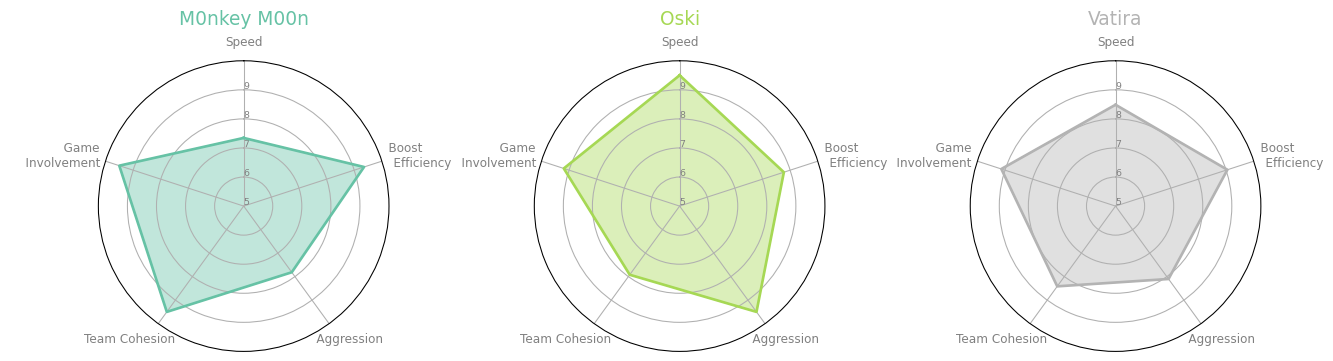

In [131]:
## radar plot code taken from github example and adapted for personal needs

# Set data
df = pd.DataFrame({
    'player' : ['M0nkey M00n', 'Oski', 'Vatira'],
    """Speed""": [min(10,speed_df.loc['monkeymoon', 'speed']
    ),min(10,speed_df.loc['oski', 'speed']
    ),min(10,speed_df.loc['vati', 'speed']
    )],
    """    Boost 
            Efficiency""":     [min(10,min(speed_df.loc['monkeymoon', 'speed'] * 2, boost_efficiency_df.loc['monkeymoon', 'boost_efficiency'])                              
    ),min(10,min(speed_df.loc['oski', 'speed'] * 2, boost_efficiency_df.loc['oski', 'boost_efficiency'])                              
    ),min(10,min(speed_df.loc['vati', 'speed'] * 2, boost_efficiency_df.loc['vati', 'boost_efficiency'])                              
    )],
    """     Aggression""": [min(10,aggression_df.loc['monkeymoon', 'aggression']
    ),min(10,aggression_df.loc['oski', 'aggression']
    ),min(10,aggression_df.loc['vati', 'aggression']
    )],
    """Team Cohesion         """: [min(10, min(speed_df.loc['monkeymoon', 'speed'] * 2, team_cohesion_df.loc['monkeymoon', 'team_cohesion']
    )),min(10, min(speed_df.loc['oski', 'speed'] * 2, team_cohesion_df.loc['oski', 'team_cohesion']
    )),min(10, min(speed_df.loc['vati', 'speed'] * 2, team_cohesion_df.loc['vati', 'team_cohesion']
    ))],
    """   Game      
    Involvement                 """: [min(10,game_involvement_df.loc['monkeymoon', 'game_involvement']
    ),min(10,game_involvement_df.loc['oski', 'game_involvement']
    ),min(10,game_involvement_df.loc['vati', 'game_involvement']
    )]
    })
  
def make_spider(df, row, title, color, rows, columns):
    
    
    categories=list(df)[1:]
    N = len(categories)
    
    # set the angles of the plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(rows,columns,row+1, polar=True)
    plt.subplots_adjust(wspace = 0.5)
    # first axis on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # one axe per variable and add labels
    plt.xticks(angles[:-1], categories, color='grey', size=9)

    # ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4,5,6,7,8,9], ['1',"2",'3',"4",'5',"6",'7', "8",'9'], color="grey", size=7)
    lowest = df.select_dtypes(include = 'number').values.min()
    plt.ylim(min(5,max(0, (int(lowest) - 1))),10)

    values=df.loc[row].drop('player').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    plt.title(title, size=14, color=color, y=1.1)
    

    
# initialize the figure
my_dpi=96
plt.figure(figsize=(1500/my_dpi, 1500/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap('Set2', len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider(df,  row=row, title=df['player'][row], color=my_palette(row), rows = 1, columns = len(df))
plt.savefig('pros-playstyle.png', pad_inches = 'tight')

In [87]:
speed_df = pd.concat([speed_df_pros, speed_df_casual], axis = 0)
boost_efficiency_df = pd.concat([boost_efficiency_df_pros, boost_efficiency_df_casual], axis = 0)
aggression_df = pd.concat([aggression_df_pros, aggression_df_casual], axis = 0)
team_cohesion_df = pd.concat([team_cohesion_df_pros, team_cohesion_df_casual], axis = 0)
game_involvement_df = pd.concat([game_involvement_df_pros, game_involvement_df_casual], axis = 0)

In [88]:


speed_df['speed'] = (speed_df.count_powerslide / 10
                    ) + (speed_df.avg_speed_percentage / 10
                    ) + (speed_df.percent_high_air
                    ) + ((speed_df.percent_low_air / speed_df.percent_ground) * 9
                    ) + (speed_df.bcpm / 66) + ((speed_df.percent_supersonic_speed/speed_df.percent_slow_speed
                    ) * 15)

speed_df['speed'] = speed_df['speed'] / max_speed * 9.5

boost_efficiency_df['boost_efficiency'] = speed_df.avg_speed_percentage * (((boost_efficiency_df.amount_collected_small / boost_efficiency_df.amount_collected
                                          ) * 25) + ((boost_efficiency_df.bcpm / boost_efficiency_df.avg_speed_percentage
                                          )) + (1 / (boost_efficiency_df.amount_overfill / boost_efficiency_df.amount_collected)
                                          ) + (0.8 / (boost_efficiency_df.amount_used_while_supersonic / boost_efficiency_df.amount_collected)
                                          ) + (75 / boost_efficiency_df.percent_zero_boost
                                          ) + (1 - (abs(boost_efficiency_df.avg_powerslide_duration - 0.1
                                          )) * 100) + (((boost_efficiency_df.percent_boost_50_75
                                                + boost_efficiency_df.percent_boost_75_100)
                                               / (boost_efficiency_df.percent_boost_0_25
                                                + boost_efficiency_df.percent_boost_25_50)
                                              ) * 10)
) / 330


                                          
                                          

boost_efficiency_df['boost_efficiency'] = (boost_efficiency_df.boost_efficiency / max_boost_eff
                                                                                    ) * 9.5
aggression_df['aggression'] = (aggression_df.amount_stolen / 100
                              ) + ((aggression_df.amount_used_while_supersonic / 100
                              ) * 1.66) + (aggression_df.avg_distance_to_mates / 540
                              ) + (aggression_df.inflicted * 6
                              ) + ((aggression_df.percent_offensive_third/aggression_df.percent_defensive_third
                              ) * 12) + ((aggression_df.percent_infront_ball / 10
                              ) * 2.2) + ((aggression_df.percent_most_forward/aggression_df.percent_most_back
                              ) * 6)


aggression_df['aggression'] = (aggression_df.aggression / max_agg) * 9.5


team_cohesion_df['team_cohesion'] = (((team_cohesion_df.amount_collected_small / team_cohesion_df.amount_collected_big
                                    ) * (boost_efficiency_df.amount_collected) 
                                    ) / 150) + (aggression_df.percent_most_back/team_cohesion_df.avg_distance_to_mates) * 800
# team_cohesion_df['team_cohesion'] = ((abs(team_cohesion_df.avg_distance_to_ball_no_possession - 
#  team_cohesion_df.avg_distance_to_ball_possession) + (team_cohesion_df.avg_distance_to_ball_no_possession - 
#  team_cohesion_df.avg_distance_to_ball_possession) / 2) / 75
# ) + ((team_cohesion_df.amount_collected_small / team_cohesion_df.amount_collected_big
#     ) * 14) + (25_000 /team_cohesion_df.avg_distance_to_mates)

team_cohesion_df['team_cohesion'] = (team_cohesion_df.team_cohesion / max_team_cohesion) * 9.5

game_involvement_df['game_involvement'] = (game_involvement_df.score / 60
                                            ) + ((game_involvement_df.amount_stolen / game_involvement_df.amount_collected
                                            ) * 25
                                            ) + ((100 - game_involvement_df.percent_ground
                                            ) / 7
                                            ) + (game_involvement_df.percent_closest_to_ball / 5
                                            # ) + ((game_involvement_df.inflicted
                                            # ) * 7
                                                ) + (game_involvement_df.score / 70)


game_involvement_df['game_involvement'] = (game_involvement_df.game_involvement / max_game_inv) * 9.5

In [89]:
speed_df

,count_powerslide,percent_supersonic_speed,avg_speed_percentage,percent_slow_speed,percent_high_air,percent_low_air,percent_ground,bcpm,speed
oski,72.335385,23.238157,72.287893,36.667189,7.588786,40.737867,51.057962,497.376185,9.500000
vati,62.471354,20.384203,69.720222,41.092010,6.852308,41.476687,51.671005,435.693972,8.486615
monkeymoon,50.260870,15.647610,67.112734,45.365997,6.726940,36.338459,56.934602,422.106681,7.345101
boay,65.368421,12.778512,65.999999,46.410296,3.720180,38.111800,58.168020,383.246965,6.711305
vinu,46.970588,11.346449,63.783887,50.844386,4.671433,37.575428,57.753138,369.229747,6.270653
eden,61.420000,16.416315,66.682608,45.646880,5.209482,37.620173,57.170346,437.948231,7.384994
cho,85.000000,7.158532,61.432494,56.463805,2.252756,28.418530,69.328714,283.579037,5.498590


/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_2283/2979976809.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap('Set2', len(df.index))


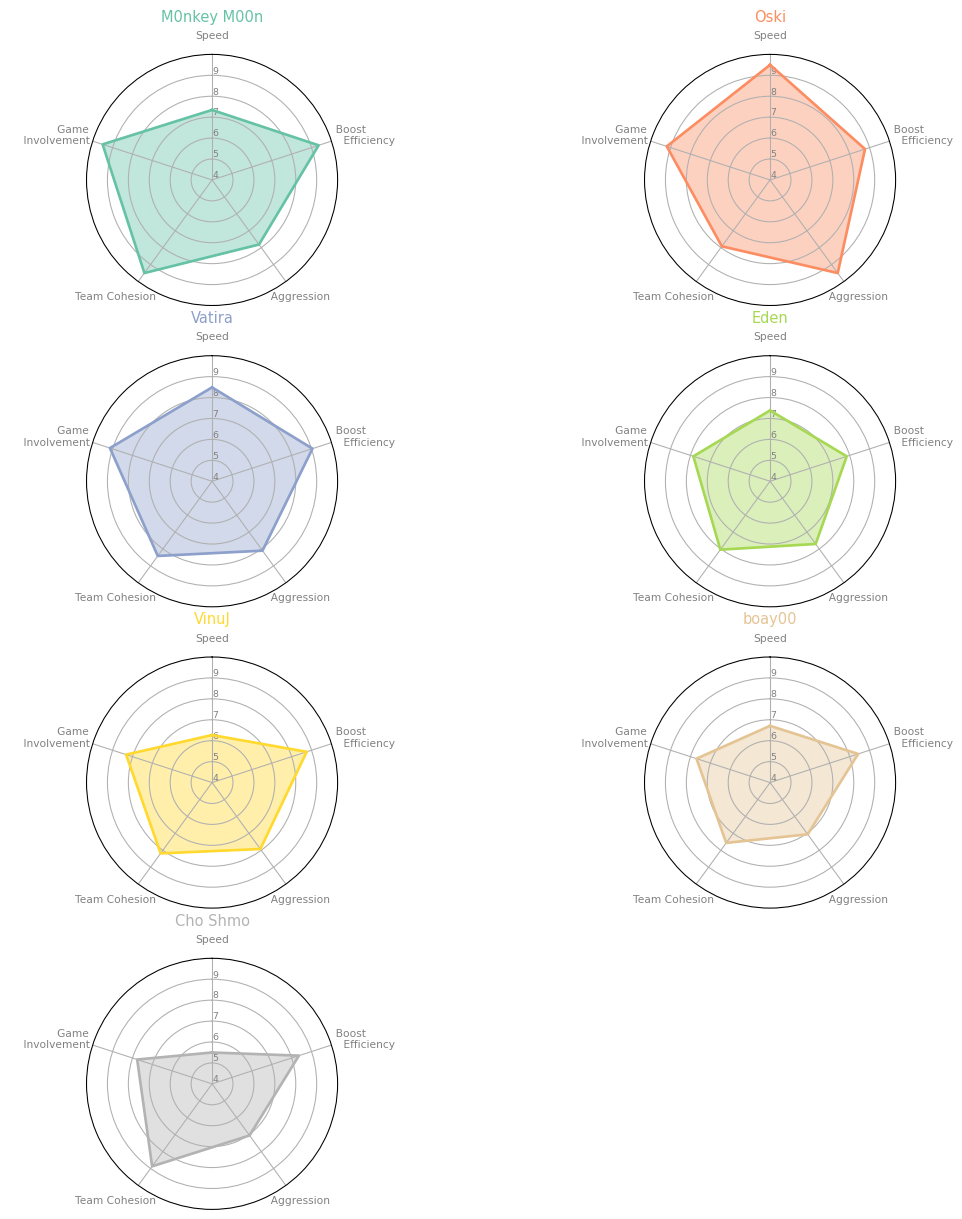

In [90]:
## radar plot code taken from github example and adapted for personal needs

from math import pi 
# Set data
df = pd.DataFrame({
    'player' : ['M0nkey M00n', 'Oski', 'Vatira', 'Eden', 'VinuJ','boay00','Cho Shmo'],
    """Speed""": [min(10,speed_df.loc['monkeymoon', 'speed']
    ),min(10,speed_df.loc['oski', 'speed']
    ),min(10,speed_df.loc['vati', 'speed']
    ),min(10,speed_df.loc['eden', 'speed']
    ),min(10,speed_df.loc['vinu', 'speed']
    ),min(10,speed_df.loc['boay', 'speed']
    ),min(10,speed_df.loc['cho', 'speed']
    )],
    """  Boost 
            Efficiency""":     [min(10,min(speed_df.loc['monkeymoon', 'speed'] * 2, boost_efficiency_df.loc['monkeymoon', 'boost_efficiency'])                              
    ),min(10,min(speed_df.loc['oski', 'speed'] * 2, boost_efficiency_df.loc['oski', 'boost_efficiency'])                              
    ),min(10,min(speed_df.loc['vati', 'speed'] * 2, boost_efficiency_df.loc['vati', 'boost_efficiency'])                              
    ),min(10,min(speed_df.loc['eden', 'speed'] * 2, boost_efficiency_df.loc['eden', 'boost_efficiency'])                              
    ),min(10,min(speed_df.loc['vinu', 'speed'] * 2, boost_efficiency_df.loc['vinu', 'boost_efficiency'])                              
    ),min(10,min(speed_df.loc['boay', 'speed'] * 2, boost_efficiency_df.loc['boay', 'boost_efficiency'])                              
    ),min(10,min(speed_df.loc['cho', 'speed'] * 2, boost_efficiency_df.loc['cho', 'boost_efficiency'])                              
    )],
    """  Aggression""": [min(10,aggression_df.loc['monkeymoon', 'aggression']
    ),min(10,aggression_df.loc['oski', 'aggression']
    ),min(10,aggression_df.loc['vati', 'aggression']
    ),min(10,aggression_df.loc['eden', 'aggression']
    ),min(10,aggression_df.loc['vinu', 'aggression']
    ),min(10,aggression_df.loc['boay', 'aggression']
    ),min(10,aggression_df.loc['cho', 'aggression']
    )],
    """Team Cohesion       """: [min(10, min(speed_df.loc['monkeymoon', 'speed'] * 2, team_cohesion_df.loc['monkeymoon', 'team_cohesion']
    )),min(10, min(speed_df.loc['oski', 'speed'] * 2, team_cohesion_df.loc['oski', 'team_cohesion']
    )),min(10, min(speed_df.loc['vati', 'speed'] * 2, team_cohesion_df.loc['vati', 'team_cohesion']
    )),min(10, min(speed_df.loc['eden', 'speed'] * 2, team_cohesion_df.loc['eden', 'team_cohesion']
    )),min(10, min(speed_df.loc['vinu', 'speed'] * 2, team_cohesion_df.loc['vinu', 'team_cohesion']
    )),min(10, min(speed_df.loc['boay', 'speed'] * 2, team_cohesion_df.loc['boay', 'team_cohesion']
    )),min(10, min(speed_df.loc['cho', 'speed'] * 2, team_cohesion_df.loc['cho', 'team_cohesion']
    ))],
    """   Game    
    Involvement               """: [min(10,game_involvement_df.loc['monkeymoon', 'game_involvement']
    ),min(10,game_involvement_df.loc['oski', 'game_involvement']
    ),min(10,game_involvement_df.loc['vati', 'game_involvement']
    ),min(10,game_involvement_df.loc['eden', 'game_involvement']
    ),min(10,game_involvement_df.loc['vinu', 'game_involvement']
    ),min(10,game_involvement_df.loc['boay', 'game_involvement']
    ),min(10,game_involvement_df.loc['cho', 'game_involvement']
    )]
    })
  
    
# initialize the figure
my_dpi=96
plt.figure(figsize=(1200/my_dpi, 1500/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap('Set2', len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider(df = df, row=row, title=df['player'][row], color=my_palette(row), rows = 4, columns = 2)

- Initial predictions that Oski would be the fastest player are supported by this plot

- Vatira has a very well balanced set of stats

- MonkeyMoon appears to be very strong in boost efficiency and team cohesion, but also has lower values comparatively for speed and aggression

---

- Predictions from the ET model suggest that Vinu has a strong correlation with MonkeyMoon's playstyle, this figure also supports this, with a plot shape similar in structure to that of monkeymoon. Both players have lower speed and aggression stats in comparison to their other stats, and high boost efficiencies when compared to other players.
- Edens playstyle was predicted to be most similar in shape to Vatira, who has a very rounded stat structure. Eden appears to follow this pattern, with generally lower values for each stat.
- Bede's playstlye was predicted to be most similar to MonkeyMoon, and somewhat similar to Vatira. The plot above does not confirm or suggest this, since Bede's playstyle is mostly unlike any of the three pros selected

In [ ]:
max_game_inv

- Max metrics from the pro players are saved and used as max references for later playstyle predictions

In [132]:
with open('max_metrics_.pickle', 'wb') as picklefile:
    pickle.dump((max_speed, max_boost_eff, max_agg, max_team_cohesion, max_game_inv), picklefile)
with open('../../app_files/max_metrics_2.pickle', 'wb') as picklefile:
    pickle.dump((max_speed, max_boost_eff, max_agg, max_team_cohesion, max_game_inv), picklefile)

In [101]:
df_comb = pd.concat([monkeymoon, oski, vati], axis = 0)

In [110]:
df_comb.player_name.unique()

array(['M0nkey M00n', 'Oski', 'Vati'], dtype=object)

In [135]:
df_comb.columns

Index(['Unnamed: 0', 'shots', 'shots_against', 'goals', 'goals_against',
       'saves', 'assists', 'score', 'mvp', 'shooting_percentage', 'bpm',
       'bcpm', 'avg_amount', 'amount_collected', 'amount_stolen',
       'amount_collected_big', 'amount_stolen_big', 'amount_collected_small',
       'amount_stolen_small', 'count_collected_big', 'count_stolen_big',
       'count_collected_small', 'count_stolen_small', 'amount_overfill',
       'amount_overfill_stolen', 'amount_used_while_supersonic',
       'time_zero_boost', 'percent_zero_boost', 'time_full_boost',
       'percent_full_boost', 'time_boost_0_25', 'time_boost_25_50',
       'time_boost_50_75', 'time_boost_75_100', 'percent_boost_0_25',
       'percent_boost_25_50', 'percent_boost_50_75', 'percent_boost_75_100',
       'avg_speed', 'total_distance', 'time_supersonic_speed',
       'time_boost_speed', 'time_slow_speed', 'time_ground', 'time_low_air',
       'time_high_air', 'time_powerslide', 'count_powerslide',
       'avg_po

/Users/bede/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/bede/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Small Pad : Big Pad ratio in pro players')

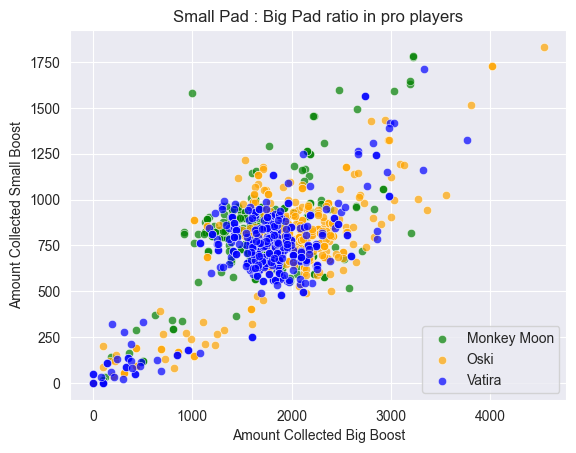

In [139]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.scatterplot(df_comb[df_comb.player_name == 'M0nkey M00n'].amount_collected_big, 
                df_comb[df_comb.player_name == 'M0nkey M00n'].amount_collected_small, 
                color = 'green',
                alpha = 0.7 ,
                label = 'Monkey Moon'
               )

sns.scatterplot(df_comb[df_comb.player_name == 'Oski'].amount_collected_big, 
                df_comb[df_comb.player_name == 'Oski'].amount_collected_small, 
                color = 'orange',
                alpha = 0.7,
                label = 'Oski'
               )
sns.scatterplot(df_comb[df_comb.player_name == 'Vati'].amount_collected_big, 
                df_comb[df_comb.player_name == 'Vati'].amount_collected_small, 
                color = 'blue',
                alpha = 0.7,
                label = 'Vatira'
               
               )
plt.ylabel('Amount Collected Small Boost')
plt.xlabel('Amount Collected Big Boost')
plt.title('Small Pad : Big Pad ratio in pro players')

- scatter plots are hard to read, so regression plot added for clarity

/Users/bede/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/bede/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/bede/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

Text(0.5, 1.0, 'Small Pad : Big Pad ratio in pro players')

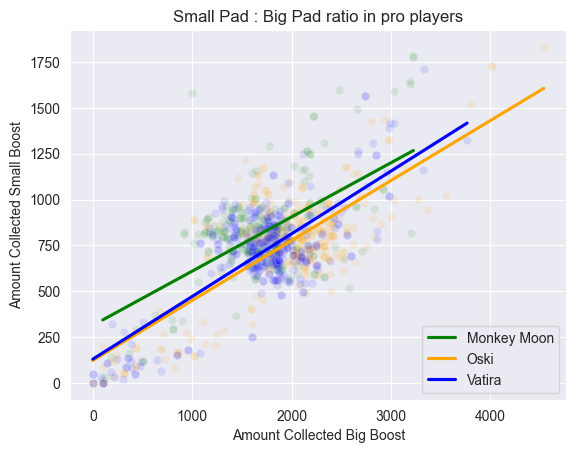

In [141]:
sns.scatterplot(df_comb[df_comb.player_name == 'M0nkey M00n'].amount_collected_big, 
                df_comb[df_comb.player_name == 'M0nkey M00n'].amount_collected_small, 
                color = 'green',
                alpha = 0.1,
               )

sns.scatterplot(df_comb[df_comb.player_name == 'Oski'].amount_collected_big, 
                df_comb[df_comb.player_name == 'Oski'].amount_collected_small, 
                color = 'orange',
                alpha = 0.1,
               )
sns.scatterplot(df_comb[df_comb.player_name == 'Vati'].amount_collected_big, 
                df_comb[df_comb.player_name == 'Vati'].amount_collected_small, 
                color = 'blue',
                alpha = 0.1,

               )


sns.regplot(df_comb[df_comb.player_name == 'M0nkey M00n'].amount_collected_big, 
                df_comb[df_comb.player_name == 'M0nkey M00n'].amount_collected_small, 
                color = 'green',
            ci = 0,
            scatter = False,
               label = 'Monkey Moon'

                
               )

sns.regplot(df_comb[df_comb.player_name == 'Oski'].amount_collected_big, 
                df_comb[df_comb.player_name == 'Oski'].amount_collected_small, 
                color = 'orange',
            ci = 0,
            scatter = False,
               label = 'Oski'

                
               )
sns.regplot(df_comb[df_comb.player_name == 'Vati'].amount_collected_big, 
                df_comb[df_comb.player_name == 'Vati'].amount_collected_small, 
                color = 'blue',
                ci = 0,
            scatter = False,
            label = 'Vatira'

               
               )
plt.legend()
plt.ylabel('Amount Collected Small Boost')
plt.xlabel('Amount Collected Big Boost')
plt.title('Small Pad : Big Pad ratio in pro players')

- Monkey Moon has a higher small pad : big pad ratio than the other two pros, which justifies his higher boost efficiency stat calculated earlier
- Oski generally has a low ratio in comparison

/Users/bede/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/bede/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/bede/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

Text(0.5, 1.0, 'Pro Players Team Positioning')

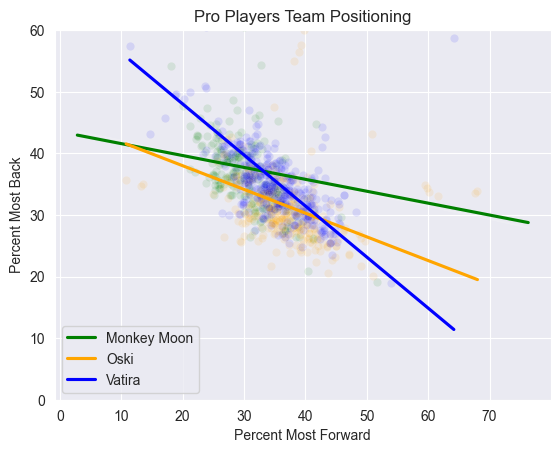

In [133]:
sns.scatterplot(df_comb[df_comb.player_name == 'M0nkey M00n'].percent_most_forward, 
                df_comb[df_comb.player_name == 'M0nkey M00n'].percent_most_back, 
                color = 'green',
                alpha = 0.1,
               )

sns.scatterplot(df_comb[df_comb.player_name == 'Oski'].percent_most_forward, 
                df_comb[df_comb.player_name == 'Oski'].percent_most_back, 
                color = 'orange',
                alpha = 0.1,
               )
sns.scatterplot(df_comb[df_comb.player_name == 'Vati'].percent_most_forward, 
                df_comb[df_comb.player_name == 'Vati'].percent_most_back, 
                color = 'blue',
                alpha = 0.1,

               )


sns.regplot(df_comb[df_comb.player_name == 'M0nkey M00n'].percent_most_forward, 
                df_comb[df_comb.player_name == 'M0nkey M00n'].percent_most_back, 
                color = 'green',
            ci = 0,
            scatter = False,
               label = 'Monkey Moon'

                
               )

sns.regplot(df_comb[df_comb.player_name == 'Oski'].percent_most_forward, 
                df_comb[df_comb.player_name == 'Oski'].percent_most_back, 
                color = 'orange',
            ci = 0,
            scatter = False,
               label = 'Oski'

                
               )
sns.regplot(df_comb[df_comb.player_name == 'Vati'].percent_most_forward, 
                df_comb[df_comb.player_name == 'Vati'].percent_most_back, 
                color = 'blue',
                ci = 0,
            scatter = False,
            label = 'Vatira'

               
               )
plt.ylim(0,60)
plt.legend()
plt.xlabel('Percent Most Forward')
plt.ylabel('Percent Most Back')
plt.title('Pro Players Team Positioning')

- Oski has the highest ratio of being most forward : most back, although vatira has many examples with a very high percentage of time most forward
- Monkey Moon generally spends the most time as last man back compared to the other two players 

/Users/bede/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/bede/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/bede/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

Text(0.5, 1.0, 'Pro Players Boost Wasted')

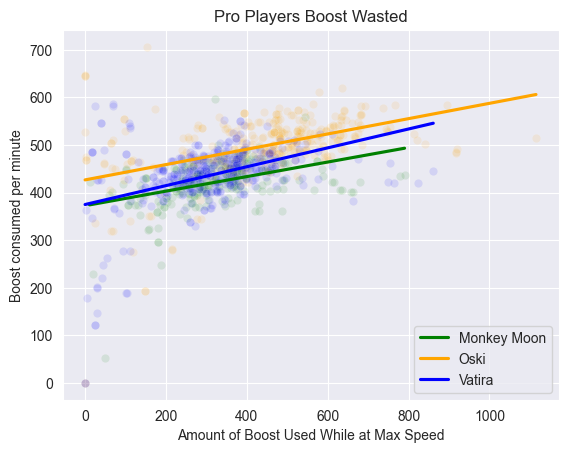

In [142]:
sns.scatterplot(df_comb[df_comb.player_name == 'M0nkey M00n'].amount_used_while_supersonic, 
                df_comb[df_comb.player_name == 'M0nkey M00n'].bcpm, 
                color = 'green',
                alpha = 0.1,
               )

sns.scatterplot(df_comb[df_comb.player_name == 'Oski'].amount_used_while_supersonic, 
                df_comb[df_comb.player_name == 'Oski'].bcpm, 
                color = 'orange',
                alpha = 0.1,
               )
sns.scatterplot(df_comb[df_comb.player_name == 'Vati'].amount_used_while_supersonic, 
                df_comb[df_comb.player_name == 'Vati'].bcpm, 
                color = 'blue',
                alpha = 0.1,

               )


sns.regplot(df_comb[df_comb.player_name == 'M0nkey M00n'].amount_used_while_supersonic, 
                df_comb[df_comb.player_name == 'M0nkey M00n'].bcpm, 
                color = 'green',
            ci = 0,
            scatter = False,
               label = 'Monkey Moon'

                
               )

sns.regplot(df_comb[df_comb.player_name == 'Oski'].amount_used_while_supersonic, 
                df_comb[df_comb.player_name == 'Oski'].bcpm, 
                color = 'orange',
            ci = 0,
            scatter = False,
               label = 'Oski'

                
               )
sns.regplot(df_comb[df_comb.player_name == 'Vati'].amount_used_while_supersonic, 
                df_comb[df_comb.player_name == 'Vati'].bcpm, 
                color = 'blue',
                ci = 0,
            scatter = False,
            label = 'Vatira'

               
               )
plt.legend()
plt.xlabel('Amount of Boost Used While at Max Speed')
plt.ylabel('Boost consumed per minute')
plt.title('Pro Players Boost Wasted')

- Oski has the most boost consumed per minute, as well as the most boost used at max speed
- Monkey Moon once again shows strong boost management here, with vatira somewhere between the two others

## Conclusions Playstyle EDA

---

The playstyle algorithm was successful in identifying key attributes of the three pro players' playstyles. Monkey Moon was shown to be a highly efficient and strong team player, despite slightly slower speed and aggression stats. Oski was calculated to have a fast paced, aggressive play style, whilst lacking strong boost efficiency in comparison to the other players. Vatira was found to have a well rounded playstyle, scoring highly in all attributes.

This algorithm was somewhat successful in predicting other players' playstyle. Given a single replay it is unable to provide a reliable estimate of a playstyle. In future, building the app to allow multiple replays to be analysed would be a good way to improve this feature. This would be slightly complex, and may discourage casual users from testing the app, since the user would most likely need to generate a personal authorisation api token to perform this. Furthermore, this feature would cause strain on the website being scraped, so perhaps this is something to keep in mind for the future.